# 1. Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
Age = [24,53,23,25,32,52,22,43,52,48]
Salary = [40000,52000,25000,77000,48000,110000,38000,44000,27000,65000]
Degree = ['Yes','No','No','Yes','Yes','Yes','Yes','No','No','Yes']

df = pd.DataFrame(np.array([Age,Salary,Degree]).T,columns=['Age','Salary','Degree'])

In [3]:
df['Age'], df['Salary'] =  df.Age.astype(int), df.Salary.astype(int)

In [4]:
#Referred the following links
#https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
#https://machinewithdata.com/2020/06/17/deriving-decision-tree-using-entropy-id3-approach/

class DecisionTreeclassifier:
    
    
    def __init__(self,max_depth=10):
        self.max_depth = 10
        self.depth = 0
        self.tree = {}
        
    def entropy(self,y):
        vals = np.array(pd.value_counts(y).keys())
        n = len(y)
        return sum([-np.sum(y==val)/n* np.log2(np.sum(y==val)/n + 1e-10) for val in vals])
    
    def conditional_entropy(self,X,y):
        vals = np.array(pd.value_counts(X).keys())
        labels = np.array(pd.value_counts(y).keys())
        n = len(X)
        s = 0
        for val in vals:
            col = X==val
            s+= sum([-np.sum(col[y==label])/np.sum(col) *np.log2(np.sum(col[y==label])/np.sum(col) +1e-10)*np.sum(col)/n for label in labels])
        return s
    
    def info_gain(self,X,y):
        return self.entropy(y)-self.conditional_entropy(X,y)
    
    def max_info_split(self,X,y):
        info_gains = []
        for val in X:
            col = X<val
            inf_gain_val = self.info_gain(col,y)
            info_gains.append((val,inf_gain_val))
        return max(info_gains,key=lambda x:x[1])
    
    def get_best_split(self,X,y):
        splits = []
        for col in X.columns:
            splits.append((col,*self.max_info_split(X[col],y)))
        return max(splits,key=lambda x:x[2])
    
    def construct_tree(self,X,y,node={},d=0):
        self.X = X
        self.y = y
        if node is None:
            return None

        if y is None:
            return None

        if len(pd.value_counts(y))==1:
            return {'val':y.values[0]}

        attr, cutoff, info_gain = self.get_best_split(X,y)

        y_left, y_right = y[X[attr]<cutoff] ,  y[X[attr]>=cutoff]


        node = {'col':attr,'cutoff':cutoff, 'info_gain':info_gain}


        node['left'] = self.construct_tree(X[X[attr]<cutoff], y_left, {}, d+1)

        node['right'] = self.construct_tree(X[X[attr]>=cutoff],  y_right , {}, d+1)

        self.depth+=1
        
        self.tree = node
        return node
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.construct_tree(X,y)
        return self

In [5]:
X, y = df.drop('Degree',axis=1), df['Degree']

In [6]:
d = DecisionTreeclassifier()
d.fit(X,y)

print(d.tree)
print('Depth of tree:',d.depth)

{'col': 'Salary', 'cutoff': 38000, 'info_gain': 0.3219280948585085, 'left': {'val': 'No'}, 'right': {'col': 'Age', 'cutoff': 43, 'info_gain': 0.31127812438699803, 'left': {'val': 'Yes'}, 'right': {'col': 'Salary', 'cutoff': 65000, 'info_gain': 0.9999999998557304, 'left': {'val': 'No'}, 'right': {'val': 'Yes'}}}}
Depth of tree: 3


In [7]:


class MultivariateDecisionTree:
    
    
    def __init__(self,max_depth=10):
        self.max_depth = 10
        self.depth = 0
        self.tree = {}
        
    def entropy(self,y):
        vals = np.array(pd.value_counts(y).keys())
        n = len(y)
        return sum([-np.sum(y==val)/n* np.log2(np.sum(y==val)/n + 1e-10) for val in vals])
    
    def conditional_entropy(self,X,y):
        vals = np.array(pd.value_counts(X).keys())
        labels = np.array(pd.value_counts(y).keys())
        n = len(X)
        s = 0
        for val in vals:
            col = X==val
            s+= sum([-np.sum(col[y==label])/np.sum(col) *np.log2(np.sum(col[y==label])/np.sum(col) +1e-10)*np.sum(col)/n for label in labels])
        return s
    
    def info_gain(self,X,y):
        return self.entropy(y)-self.conditional_entropy(X,y)
    
    def max_info_split(self,X,col,y,alpha, beta):
        info_gains = []
        
        t = col < alpha*X['Age']+beta*X['Salary']-1
        inf_gain_val = self.info_gain(t,y)
        info_gains.append((val,inf_gain_val))
        return max(info_gains,key=lambda x:x[1])
    
    def get_best_split(self,X,y):
        splits = []
        alpha = np.random.rand()
        beta = np.random.rand()
    
            
        for col in X.columns:
            splits.append((col,*self.max_info_split(X,X[col],y,alpha,beta)))
        return max(splits,key=lambda x:x[2])
    
    def construct_tree(self,X,y,node={},d=0):
        self.X = X
        self.y = y
        if node is None:
            return None

        if y is None:
            return None

        if len(pd.value_counts(y))==1:
            return {'val':y.values[0]}

        attr, cutoff, info_gain = self.get_best_split(X,y)

        y_left, y_right = y[X[attr]<cutoff] ,  y[X[attr]>=cutoff]


        node = {'col':attr,'cutoff':cutoff, 'info_gain':info_gain}


        node['left'] = self.construct_tree(X[X[attr]<cutoff], y_left, {}, d+1)

        node['right'] = self.construct_tree(X[X[attr]>=cutoff],  y_right , {}, d+1)

        self.depth+=1
        
        self.tree = node
        return node
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.construct_tree(X,y)
        return self

In [8]:
# mtree = MultivariateDecisionTree()
# mtree.fit(X,y)

The main adavantage multivariate decision trees have is that they are better in expressing the realtionship between the features which is not possible through univariate trees.


Univarite decision tree has an advantage that multivatiate does not, that is, in univariate only one attribute is considered at each node to split, so only the attribute which results in more info gain is picked, whereas in multivariate trees even if an attribute is not contributing to that split it is still used.

And the other adavantage is that univariate decision trees are often more simpler and faster than mutlivariate trees.

# 2. Bagging and Boosting

In [9]:
class Adaboost:
    def __init__(self):
        self.alphas = []
        self.trees = []
        self.T = None
        self.training_errors = []
        self.testing_errors = []
    
    @property
    def __name__(self):
        return 'Adaboost'
        
    def get_error(self,y, y_pred):
        return np.sum(y!=np.round(y_pred))/len(y)

    def get_alpha(self,error):
        return 1/2*np.log((1 - error) / (error+1e-10))

    def update_weights(self,w_i, alpha, y, y_pred):
        return w_i * np.exp(-alpha * (y!=y_pred).astype(int))
        
    def fit(self, X, y, max_depth = None, T = 20):
        
        self.alphas = [] 
        self.training_errors = []
        self.T = T

        w_i = np.ones(len(y)) * 1 / len(y) 
        for t in range(0, T):

            tree = DecisionTreeClassifier(max_depth=None)
            tree.fit(X, y, sample_weight = w_i)
            y_pred = tree.predict(X)
            
            self.trees.append(tree)
            error = self.get_error(y, y_pred)
            self.training_errors.append(error)
            alpha = self.get_alpha(error)
            w_i = self.update_weights(w_i, alpha, y, y_pred)
            self.alphas.append(alpha)
        
        return self
            
    def predict(self, X,y):

        preds = []
        self.testing_errors = []
        
        for t in range(self.T):
            y_pred = self.trees[t].predict(X)
            y_pred_t = y_pred*self.alphas[t]
            y_pred = np.sign(y_pred_t)
            error_test = np.sum(y!=y_pred)/len(y)
            self.testing_errors.append(error_test)
            preds.append(y_pred_t)
        preds = np.array(preds).T
        
        return np.array(np.sign(np.sum(preds,axis=1)))


In [10]:
class Bagging:
    def __init__(self):
        self.T = None
        self.trees = []
        self.training_errors = []
        self.testing_errors = []
    
    @property
    def __name__(self):
        return 'Bagging'
    
    def subsample(self,dataset, ratio=0.5):
        sample = dataset.sample(frac=ratio,replace=True).reset_index(drop=True)
        return sample
    
    def get_error(self,y,y_pred):
        return np.sum(y!=np.round(y_pred))/len(y)
    
    def fit(self,X,y,class_index = 20, max_depth=None, T=20):
        self.T = T
        self.X = X
        self.y = y
        for i in range(self.T):
            data = pd.concat([X,y],axis=1)
            sample = self.subsample(data)
            X_s, y_s = sample.drop(class_index,axis=1), sample[class_index]
            tree = DecisionTreeClassifier(max_depth=max_depth)
            tree.fit(X_s,y_s)
            y_pred = tree.predict(X_s)
            self.training_errors.append(self.get_error(y_s,y_pred))
            self.trees.append(tree)
    
    def predict(self,X,y):
        preds = []
        self.testing_errors = []
        for i in range(self.T):
            y_pred = self.trees[i].predict(X)
            self.testing_errors.append(self.get_error(y,y_pred))
            preds.append(y_pred)
        
        preds = np.array(preds).T
        
        return np.array([np.bincount(y_t.astype(int)).argmax() for y_t in preds])

In [11]:
letters_data = pd.read_csv('letter-recognition.data',sep=',',header=None)

In [12]:
letters_df = letters_data[letters_data[0].isin(['C','G'])]

In [28]:
letters_df.iloc[:,0] = LabelEncoder().fit_transform(letters_df[0])

In [14]:
X,y = letters_df.drop(0,axis=1), letters_df[0]

In [15]:
def plot_errors(X_train, X_test, y_train, y_test, class_index=20, dataset='letters'):
    for i in range(1,26,4):
        adaboost = Adaboost()
        adaboost.fit(X_train,y_train,max_depth=i,T=5*i)
        
        
        print('Adaboost Final Training Error:',adaboost.get_error(y_train,adaboost.predict(X_train,y_train)))
        pred1 = adaboost.predict(X_test,y_test)
        print('Adaboost Final Testing Error:',adaboost.get_error(y_test,pred1))
        
        
        bagging = Bagging()
        bagging.fit(X_train,y_train,class_index, max_depth=i,T=5*i)
        print('==========================')
        print('Bagging Final Training Error:',adaboost.get_error(y_train,bagging.predict(X_train,y_train)))
        pred2 = bagging.predict(X_test,y_test)
        print('Bagging Final Testing Error:',bagging.get_error(y_test,pred2))
        
        plt.plot(list(range(adaboost.T)), adaboost.testing_errors,label='adaboost',color='r')
        plt.plot(list(range(bagging.T)), bagging.testing_errors, label='bagging',color='b')
        plt.legend()
        plt.title('Depth='+str(i)+' Rounds='+str(5*i))
        plt.xlabel('Rounds')
        plt.ylabel('Testing Errors')
        plt.show()

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.04415011037527594
Bagging Final Training Error: 0.21306818181818182
Bagging Final Testing Error: 0.25165562913907286


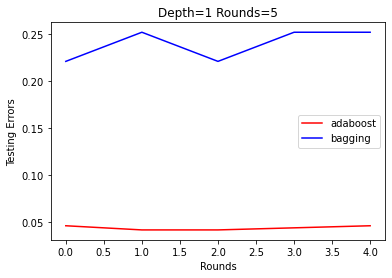

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.03409090909090909
Bagging Final Testing Error: 0.0728476821192053


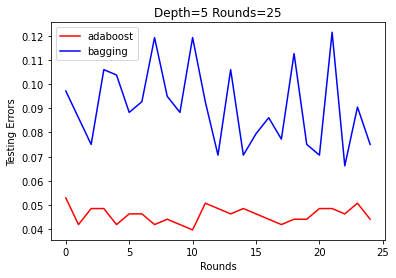

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.015151515151515152
Bagging Final Testing Error: 0.052980132450331126


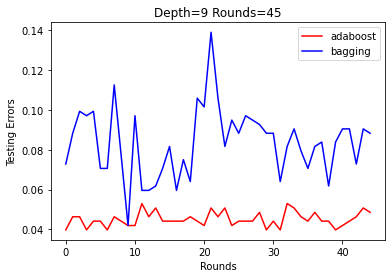

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.004734848484848485
Bagging Final Testing Error: 0.04415011037527594


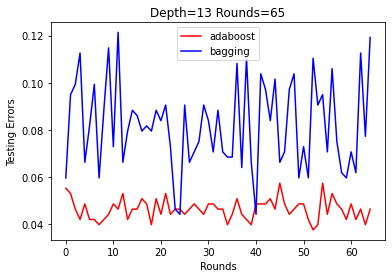

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.010416666666666666
Bagging Final Testing Error: 0.04415011037527594


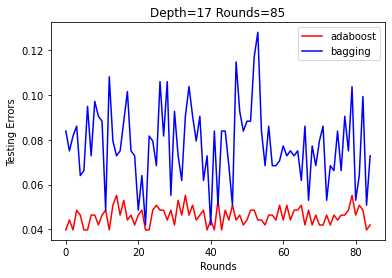

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.006628787878787879
Bagging Final Testing Error: 0.046357615894039736


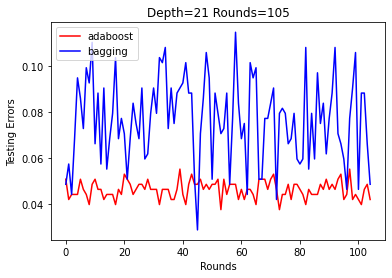

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.05077262693156733
Bagging Final Training Error: 0.005681818181818182
Bagging Final Testing Error: 0.04415011037527594


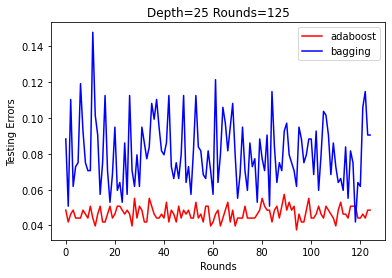

In [16]:
plot_errors(*train_test_split(X,y,test_size=0.3,random_state=42), 0, 'letters')

In [17]:
df = pd.read_csv('german.data',sep=' ',header=None)

In [18]:
df[20] = LabelEncoder().fit_transform(df[20])

In [19]:
catcols = df.select_dtypes(include='object')

In [20]:
catcols = catcols.apply(lambda x: LabelEncoder().fit_transform(x))

In [21]:
for col in catcols.columns:
    df[col] = catcols[col]

In [22]:
X, y = df.drop(20,axis=1), df[20]

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.3466666666666667
Bagging Final Training Error: 0.2985714285714286
Bagging Final Testing Error: 0.30333333333333334


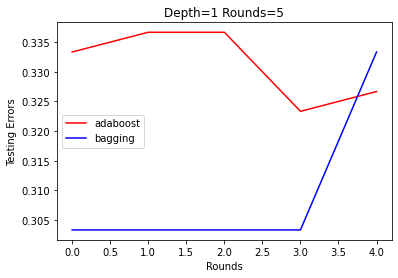

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.16857142857142857
Bagging Final Testing Error: 0.2733333333333333


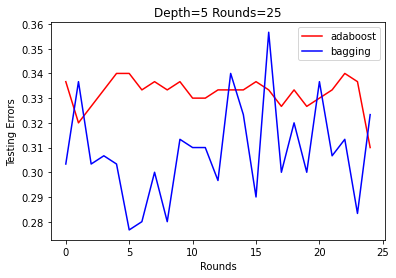

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.06428571428571428
Bagging Final Testing Error: 0.25


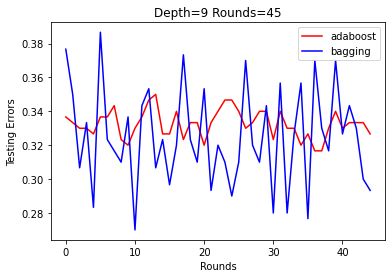

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.03857142857142857
Bagging Final Testing Error: 0.25


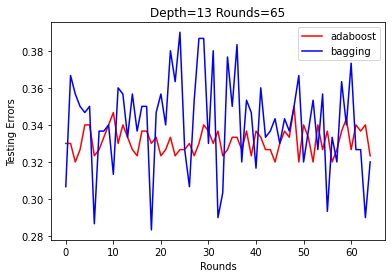

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.04
Bagging Final Testing Error: 0.25666666666666665


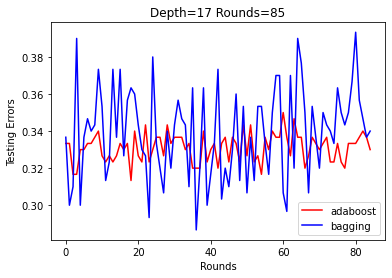

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.041428571428571426
Bagging Final Testing Error: 0.24333333333333335


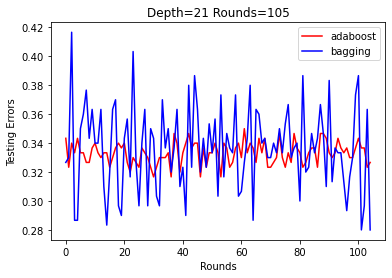

Adaboost Final Training Error: 0.0
Adaboost Final Testing Error: 0.35333333333333333
Bagging Final Training Error: 0.03571428571428571
Bagging Final Testing Error: 0.23666666666666666


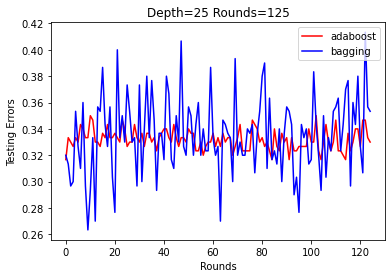

In [23]:
plot_errors(*train_test_split(X,y,test_size=0.3,random_state=42), 20, 'credit-data')

In [24]:
df3 = pd.read_csv('spambase.data',sep=',',header=None)

In [25]:
X,y = df3.drop(57,axis=1) , df3[57]

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10209992758870384
Bagging Final Training Error: 0.1984472049689441
Bagging Final Testing Error: 0.2179580014482259


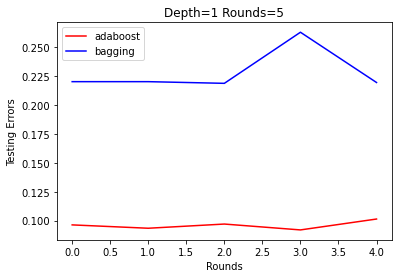

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.0670807453416149
Bagging Final Testing Error: 0.08254887762490949


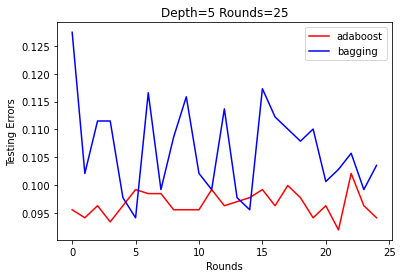

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.04254658385093168
Bagging Final Testing Error: 0.07023895727733527


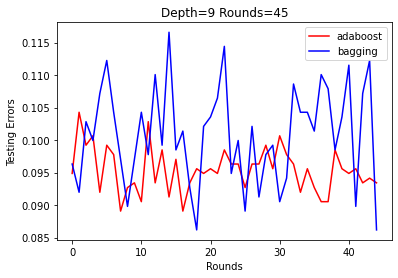

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.034782608695652174
Bagging Final Testing Error: 0.07168718320057929


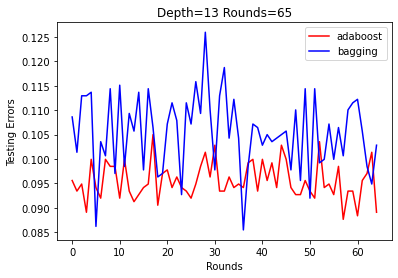

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.027950310559006212
Bagging Final Testing Error: 0.06806661839246922


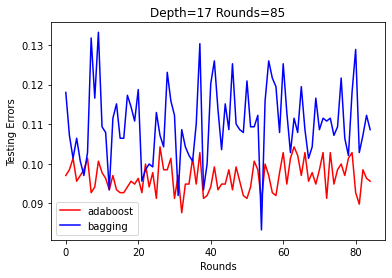

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.020496894409937887
Bagging Final Testing Error: 0.06299782766111513


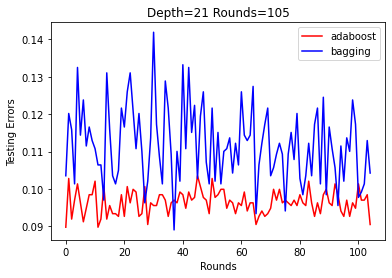

Adaboost Final Training Error: 0.00031055900621118014
Adaboost Final Testing Error: 0.10354815351194786
Bagging Final Training Error: 0.020186335403726708
Bagging Final Testing Error: 0.06589427950760318


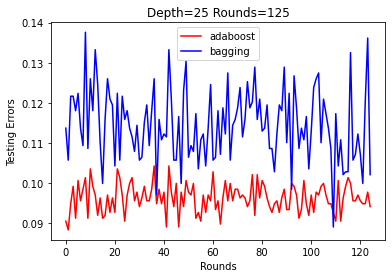

In [26]:
plot_errors(*train_test_split(X,y,test_size=0.3,random_state=42), 57, 'spambase data')

The main assumption of Bagging is that it is always trained on a sub sample of the data, which will avoid overfitting on the train data. This can be seen on the credit data, where bagging has lower test error than boosting.

Depth of the tree seems to be more important than the number of rounds for boosting. Deeper trees are clearly better than shallow trees. 
And increasing the number of rounds seems to improve bagging unlike boosting which seems to remain same after some rounds.

This is because increasing the number of rounds would allow Bagging to see the entire dataset over time and because it might have same examples in the subsample it will learn better. And Bagging would help in improving the test error because the weak classifiers are trained on just subsamples which will avoid overfitting.


Although increasing the number of rounds even more would eventually overfit the train data and increase the test error incase of Boosting.